<img src="./images/shouke_logo.png"
     style="float: right"
     width=100
     style="padding-bottom:100px;"/>
<br>
<br>

<table style="float:center;">
    <tr>
        <td>
            <img src='./images/python-logo.png'width=120>
        </td>
        <td>
            <img src='./images/pandas-logo.png'width=150>
        </td>
        <td>
            <img src='./images/statsmodels_logo.png'width=150>
        </td>
    </tr>
</table>

<h1 style='text-align: center;'>Statistical Linear Regression Models</h1>
<h3 style='text-align: center;'>Shouke Wei, Ph.D. Professor</h3>
<h4 style='text-align: center;'>Email: shouke.wei@gmail.com</h4>

## Objective
- In this section, we will learn how to develop statistical linear regression models with Statsmodels library

## 1. Import the required packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
#import seaborn as sns
#import statsmodels.api as sm
#from sklearn import metrics
#from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Read the data

In [ ]:
df = pd.read_csv('./data/gdp_china_encoded.csv',index_col=False)
df.head()

## 3. Define independent variables (X) and dependent variable (y)

In [ ]:
X = df.drop(['gdp'],axis=1)
y = df['gdp']

## 4. Divide the dataset 
- Two parts: for model estimation/fitting and model validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

## 5. Data normalization in statistical regression (optional)

- For regression model, it widely accepts that it is not necessary to normalize the data.
- Statistical linear regression stress 'explanatory model', the estimated coefficients descibe the relation between indepent variable and dependent variable

$$\hat y\ = \beta_0\ + \beta_1x_1\ + \beta_2x_2\ + ... + \beta_px_p\$$

The regression coefficient $\beta_1$ is interpreted as the expected
change in $y$ associated with a 1-unit increase in $x_1$ while
$x_2$,..., $x_p$ are held fixed.

- I suggest using `decimal scaling` normalization method, and it will be helpful.
- We will not normalize data here

## 6. Fit the model

In [ ]:
import statsmodels.api as sm

# add a constant 
X_train = sm.add_constant(X_train) 

# define the model and fit it
model = sm.OLS(y_train, X_train)

results = model.fit()

## 7. Interprete model results

In [ ]:
results.summary()

- **Df Residuals**: Degrees of Freedom in the mode. It is calculated in the form of ‘n-k-1’, i.e. ‘numbers of observations - numbers of predicting variables - 1’
- **Df Model**: the numbers of predicting variables
- **Covariance Type**: nonrobust. Covariance measures how two variables are linked in a positive or negative manner, and a robust covariance is one calculated in a way to minimize or eliminate variables, here it is not the case.
- **R-squared**: goodness of fit, or determination coefficient. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
- **Adj. R-squared**: the percentage of variation explained by only the independent variables that actually affect the dependent variable. It will penalise us to add more independent variables which cannot affect the dependent variable. 
- **F-statistic**: assess the significance of the overall model.
- **Prob (F-statistic)**: If *P*-value for the F-Stat is less than a significance level, it can reject the null hypothesis and that an intercept-only model is better.
- **AIC**: The Akaike Information Criterion (AIC), which lets us test how well our model fits the data set without overfitting it.
- **Prob(Omnibus)**: performs a statistical test indicating the probability that the residuals are normally distributed.
- **P>|t|**: one of the most important statistics in the summary. It is a measurement of how likely the model coefficient is measured through our model by chance. The *p* value of 0.004 for year means that there is a 0.4% chance the year variable has no affect on the dependent variable, GDP. Proper model analysis will compare the *p* value to a previously established alpha value, or a threshold. A common alpha is 0.05. The *p* value is less than 0.05 is statistically significant. 
- **[0.025 0.975]**: the ends of a 95% confidence interval for the parameter 

### Problem analysis

#### (1) Multicollinearity

Multicollinearity happens when two or more independent variables are highly correlated with one another in a regression model.

It means that we can predict an independent variable by another independent variable in a regression model.

Multicollinearity causes the following basic types of problems:

-  It can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. 
-It reduces the precision of the estimated coefficients, which weakens the statistical power of the regression model. We might not be able to trust the *p*-values to identify independent variables that are statistically significant.
- It also creates an overfitting problem


#### (2) Methods to assess multicollinearity
#### Condition number
One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome.

Reference to: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

#### Correlation Heatmap

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.loc[:,'year':'uinc'].corr()

plt.figure(figsize=(17,8)) 
heat_map = sns.heatmap(corr, vmin=-1,vmax=1,annot=True)

heat_map.set_title('Correlation Heatmap',fontdict={'fontsize':12},pad=12)

#### VIF (Variance Inflation Factor)
It widely accepts that a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity, but some scholars choose a more conservative threshold of 5 or even 2.5.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
X_train = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

vif.round(1)

## 8. Model improvement

### (1) Drop the insignificant variables 

In [58]:
X_train_droped = X_train.drop(['pop','year','uinc','finv','trade','prov_zj'],axis=1)
X_train_droped

,const,fexpen,prov_hn,prov_js,prov_sd
66,1.0,0.265335,0.0,0.0,0.0
54,1.0,0.875521,0.0,0.0,1.0
36,1.0,1.062103,0.0,1.0,0.0
45,1.0,0.226185,0.0,0.0,1.0
52,1.0,0.717731,0.0,0.0,1.0
...,...,...,...,...,...
75,1.0,0.862953,0.0,0.0,0.0
9,1.0,0.433437,0.0,0.0,0.0
72,1.0,0.664598,0.0,0.0,0.0
12,1.0,0.738786,0.0,0.0,0.0


In [59]:
X_train_droped = sm.add_constant(X_train_droped)

model2 = sm.OLS(y_train, X_train_droped)
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     484.8
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.80e-45
Time:                        13:51:48   Log-Likelihood:                -38.240
No. Observations:                  66   AIC:                             86.48
Df Residuals:                      61   BIC:                             97.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6829      0.107      6.372      0.000       0.469       0.897
fexpen         6.0510      0.144     41.986      0.000       5.763       6.339
prov_hn       -0.5837      0.155     -3.761      0.000      -0.894      -0.273
prov_js        0.3991      0.149      2.686      0.009       0.102       0.696
prov_sd        0.5664      0.163      3.466      0.001       0.240       0.893
==============================================================================
Omnibus:                        0.625   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.166
Skew:                           0.025   Prob(JB):                        0.921
Kurtosis:                       3.240   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (2) check the multicollinearity

In [60]:
# For each X, calculate VIF and save in dataframe

X_train_droped = sm.add_constant(X_train_droped)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_droped.values, i) for i in range(X_train_droped.shape[1])]
vif["features"] = X_train_droped.columns

vif.round(1)

,VIF Factor,features
0,3.8,const
1,1.0,fexpen
2,1.2,prov_hn
3,1.1,prov_js
4,1.1,prov_sd


### (3) Assess the model

In [61]:
from sklearn import metrics

y_fit = res.predict(X_train_droped)

# calculate MAE, MSE, RMSE and MAPE
print ("mean_absolute_error(MAE): ", metrics.mean_absolute_error(y_train, y_fit).round(3))
print ("mean_squared_error(MSE): ", metrics.mean_squared_error(y_train, y_fit))
print ("root_mean_squared_error(RMSE): ", metrics.mean_squared_error(y_train, y_fit,squared=False))
print ("mean_absolute_percentage_error(MAPE): ",metrics.mean_absolute_percentage_error(y_train, y_fit))

mean_absolute_error(MAE):  0.343
mean_squared_error(MSE):  0.1865459902947022
root_mean_squared_error(RMSE):  0.4319097015519589
mean_absolute_percentage_error(MAPE):  0.1474308979134555


## 9. Model prediction testing

In [63]:
X_test_droped = X_test.drop(['pop','year','uinc','finv','trade','prov_zj'],axis=1)

In [64]:
X_test_droped = sm.add_constant(X_test_droped)

y_pred = res.predict(X_test_droped)

In [65]:
# calculate R-squared, MAE, MSE, RMSE and MAPE of testing
print("R-squared: ",metrics.r2_score(y_test, y_pred))
print ("mean_absolute_error(MAE): ", metrics.mean_absolute_error(y_test,y_pred))
print ("mean_squared_error(MSE): ", metrics.mean_squared_error(y_test,y_pred))
print ("root_mean_squared_error(RMSE): ", metrics.mean_squared_error(y_test,y_pred,squared=False))
print ("mean_absolute_percentage_error(MAPE): ",metrics.mean_absolute_percentage_error(y_test,y_pred))

R-squared:  0.9612162003596298
mean_absolute_error(MAE):  0.3202338958341034
mean_squared_error(MSE):  0.16298798064508582
root_mean_squared_error(RMSE):  0.4037176991972061
mean_absolute_percentage_error(MAPE):  0.19116315864614838


In [66]:
print(res.params)

const      0.682945
fexpen     6.050978
prov_hn   -0.583682
prov_js    0.399117
prov_sd    0.566370
dtype: float64


The regression equation: 

$$gdp = 0.683 + 6.051fexpen - 0.584prov\_hn + 0.399prov\_js + 0.566prov\_sd$$

## 10. Comparing prediction results

In [67]:
actual_pred_compare = pd.DataFrame({'Acutal values':y_test,
                                   'Predicted values':y_pred,
                                   'Errors':y_test-y_pred})
actual_pred_compare

,Acutal values,Predicted values,Errors
40,1.027550,1.770092,-0.742542
31,5.405822,5.334489,0.071333
46,3.093328,2.885899,0.207429
58,0.689834,1.044370,-0.354536
77,0.553301,0.407004,0.146297
49,4.536185,4.276056,0.260129
87,2.693103,2.670215,0.022888
44,2.190019,2.358725,-0.168706
88,2.959931,3.128625,-0.168694
90,3.493824,3.747210,-0.253386


## 11. Model Results Visualization

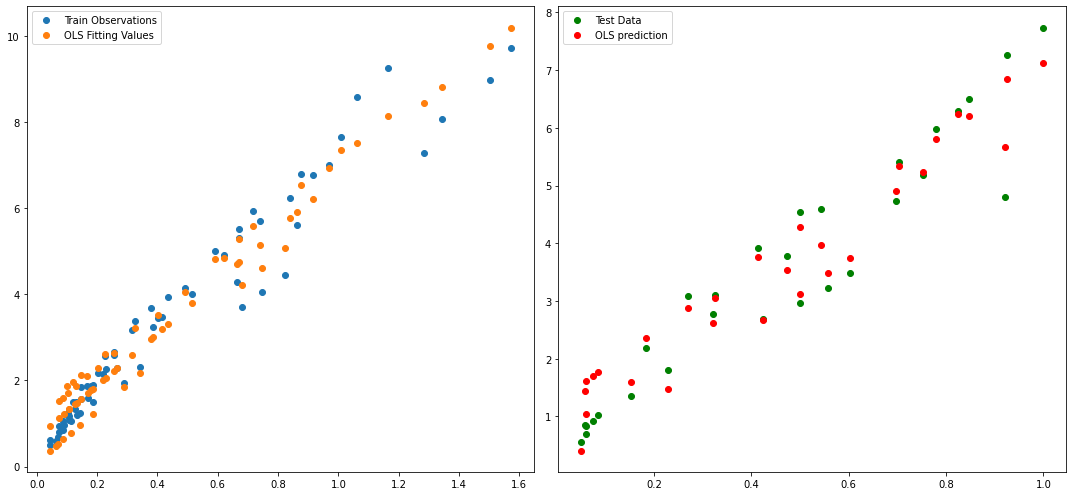

In [75]:
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize=(15,7))

axes[0].plot(X_train_droped.fexpen, y_train, "o", label="Train Observations")
axes[0].plot(X_train_droped.fexpen, y_fit, "o", label="OLS Fitting Values")
axes[0].legend(loc="best")

axes[1].plot(X_test_droped.fexpen, y_test,"go", label="Test Data")
axes[1].plot(X_test_droped.fexpen, y_pred,"ro", label="OLS prediction")
axes[1].legend(loc="best")

plt.tight_layout()

Text(0.5, 1.0, 'Linear Regression')

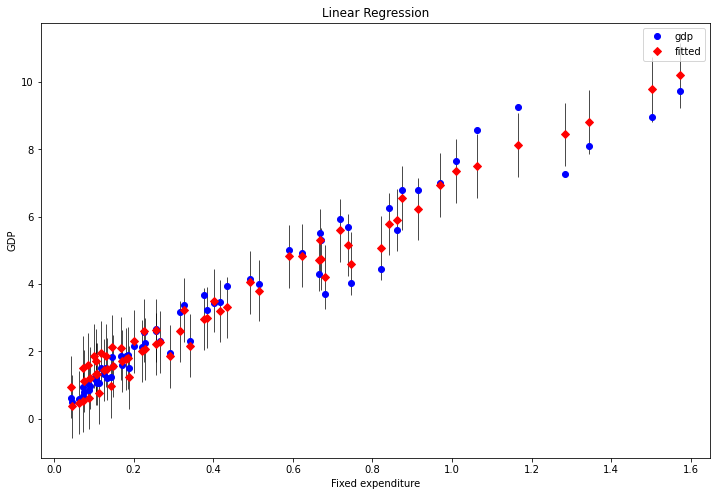

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(res, 1,ax=ax) # or use the variable name, such as "fexpen"
ax.set_ylabel("GDP")
ax.set_xlabel("Fixed expenditure")
ax.set_title("Linear Regression")

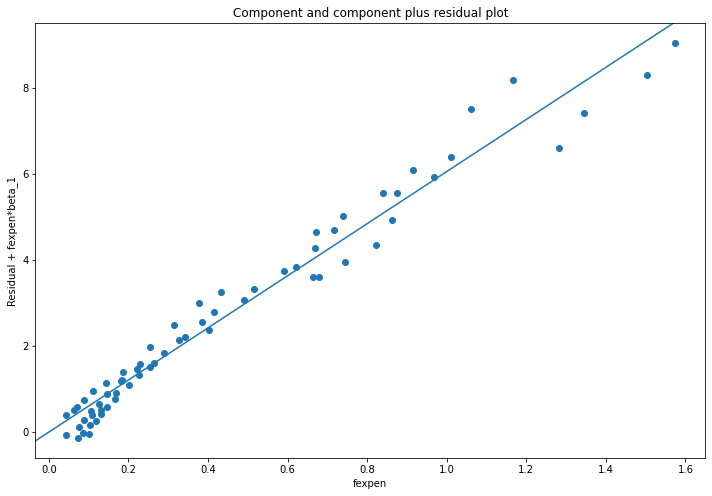

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(res, "fexpen", ax=ax)

Reference: https://www.statsmodels.org/dev/graphics.html?highlight=statsmodels%20graphics#module-statsmodels.graphics